## 모듈 import

In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline

## DB로부터 데이터 조회

In [2]:
# 지자체별_사고통계_조회
# data_지자체 변수

conn_=pymysql.connect(
                    host='khk.cepsu2i8bkn5.ap-northeast-2.rds.amazonaws.com',
                    user='khk',
                    password='k2hyokwang2!',
                    charset='utf8mb4',
                    cursorclass=pymysql.cursors.DictCursor,
                    port=3306,
                    db='scrap_data'
)

with conn_.cursor() as cursor:
    sql='SELECT * FROM 지자체별_사고통계_조회;'
    cursor.execute(sql)
    rows=cursor.fetchall()
conn_.close()
data=pd.DataFrame(rows)

## 데이터_subset 생성

In [6]:
# 시도 단위 집계 데이터프레임 생성

In [3]:
# 시군구 까지만 입력된 데이터 추출
data_siDo=data[[(re.match('\w* \w*',str(x)) ==None and True or False) for x in data['시도명']]]

# 불필요한 자료 배제
data_siDo=data_siDo.iloc[:,:13]

# 전체사고, 어린이사고, 어린이보행사고, 스쿨존내어린이사고의 행만 추출
data_siDo=data_siDo[(data_siDo['사고분류명']=='전체사고')|(data_siDo['사고분류명']=='어린이사고')|(data_siDo['사고분류명']=='어린이보행사고')|(data_siDo['사고분류명']=='스쿨존내어린이사고')]

# 데이터 전체 float으로 자료형 변형
data_siDo.iloc[:,3:]=data_siDo.iloc[:,3:].astype(np.float64)

data_siDo

,기준년도,시도명,사고분류명,사고건수,사고건수구성비,사망자수,사망자수구성비,치사율,부상자수,부상자수구성비,총사고건수,총사망자수,총부상자수
0,2010,강원도,전체사고,9026,3.98,267,4.85,2.96,15693,4.45,226878,5505,352458
1,2010,강원도,어린이사고,723,5.13,3,2.38,0.41,938,5.46,14095,126,17178
6,2010,강원도,어린이보행사고,244,3.7,1,1.27,0.41,250,3.73,6601,79,6699
7,2010,강원도,스쿨존내어린이사고,25,3.41,0,0,0,28,3.68,733,9,760
215,2010,경기도,전체사고,43963,19.38,1002,18.2,2.28,70818,20.09,226878,5505,352458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28405,2019,충청남도,스쿨존내어린이사고,14,2.47,1,16.67,7.14,15,2.55,567,6,589
28582,2019,충청북도,전체사고,9538,4.15,188,5.61,1.97,15539,4.55,229600,3349,341712
28583,2019,충청북도,어린이사고,515,4.66,1,3.57,0.19,680,4.82,11054,28,14115
28588,2019,충청북도,어린이보행사고,133,3.45,1,5,0.75,137,3.48,3856,20,3942


In [4]:
year_list=data_siDo['기준년도'].unique().tolist()

data_전체사고수=data_siDo[data_siDo['사고분류명']=='전체사고'].groupby('기준년도').sum('사고건수')
전체사고건수=data_전체사고수['사고건수'].values.tolist()

data_어린이사고건수=data_siDo[data_siDo['사고분류명']=='어린이사고'].groupby('기준년도').sum('사고건수')
어린이사고건수=data_어린이사고건수['사고건수'].values.tolist()

data_어린이보행사고=data_siDo[data_siDo['사고분류명']=='어린이보행사고'].groupby('기준년도').sum('사고건수')
어린이보행사고=data_어린이보행사고['사고건수'].values.tolist()

data_스쿨존내어린이사고=data_siDo[data_siDo['사고분류명']=='스쿨존내어린이사고'].groupby('기준년도').sum('사고건수')
스쿨존내어린이사고=data_스쿨존내어린이사고['사고건수'].values.tolist()

data_year=pd.DataFrame({'전체사고건수':전체사고건수,'어린이사고건수':어린이사고건수,'어린이보행사고건수':어린이보행사고,'스쿨존내어린이사고':스쿨존내어린이사고},index=year_list)

data_year

,전체사고건수,어린이사고건수,어린이보행사고건수,스쿨존내어린이사고
2010,226878.0,14095.0,6601.0,733.0
2011,221711.0,13323.0,6100.0,751.0
2012,223656.0,12497.0,5247.0,511.0
2013,215354.0,11728.0,4897.0,427.0
2014,223552.0,12110.0,4858.0,523.0
2015,232035.0,12191.0,4646.0,541.0
2016,220917.0,11264.0,4288.0,480.0
2017,216335.0,10960.0,4019.0,479.0
2018,217148.0,10009.0,3582.0,435.0
2019,229600.0,11054.0,3856.0,567.0


In [42]:
data_year['어린이사고비중']=data_year['어린이사고건수']/data_year['전체사고건수']
data_year['어린이사고비중']=data_year['어린이사고비중'].apply(lambda x: np.round(x,3))
data_year['어린이사고중보행사고비중']=data_year['어린이보행사고건수']/data_year['어린이사고건수']
data_year['어린이사고중보행사고비중']=data_year['어린이사고중보행사고비중'].apply(lambda x: np.round(x,3))
data_year

,전체사고건수,어린이사고건수,어린이보행사고건수,스쿨존내어린이사고,어린이사고비중,어린이사고중보행사고비중
2010,226878.0,14095.0,6601.0,733.0,0.062,0.468
2011,221711.0,13323.0,6100.0,751.0,0.060,0.458
2012,223656.0,12497.0,5247.0,511.0,0.056,0.420
2013,215354.0,11728.0,4897.0,427.0,0.054,0.418
2014,223552.0,12110.0,4858.0,523.0,0.054,0.401
2015,232035.0,12191.0,4646.0,541.0,0.053,0.381
2016,220917.0,11264.0,4288.0,480.0,0.051,0.381
2017,216335.0,10960.0,4019.0,479.0,0.051,0.367
2018,217148.0,10009.0,3582.0,435.0,0.046,0.358
2019,229600.0,11054.0,3856.0,567.0,0.048,0.349


<AxesSubplot:label='9e52a1f6-6eab-43ea-b530-1dd7fc33babc'>

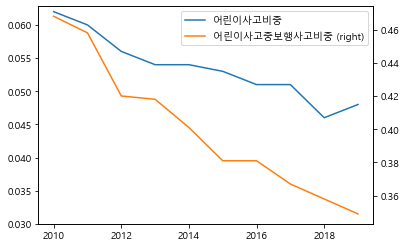

In [68]:
fig=plt.figure()
data_year['어린이사고비중'].plot(ylim=0.03,legend=True)
data_year['어린이사고중보행사고비중'].plot(secondary_y=True, legend=True)
